# Earrings Object Detection

In [ ]:
!pip install ultralytics==8.0.146

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 11.8 MB/s eta 0:00:00


In [ ]:
import ultralytics  ##就是yoloV8
ultralytics.checks()

Ultralytics YOLOv8.0.146 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## 檢查是否有所需的檔案
!ls //content/drive/MyDrive/earrings_object_detection/Yolo/data

classes.txt	earring_opencv.zip    earringP.yaml  test_photo
earring_opencv	earring_original.zip  earring.yaml


In [ ]:
# copy over the dataset into the root directory of the Colab VM

### 確認檔名ㄚㄚㄚ!
!cp /content/drive/MyDrive/earrings_object_detection/Yolo/data/earring_opencv.zip /content

In [ ]:
# unzip the dataset and the contents so that they are now in /content folder

### 確認檔名ㄚㄚㄚ!
!unzip /content/earring_opencv.zip -d /content/

串流輸出內容已截斷至最後 5000 行。
  inflating: /content/earring_opencv/labels/train/sliver_hook109.txt  
  inflating: /content/earring_opencv/labels/train/21_blue_polygon220.txt  
  inflating: /content/earring_opencv/labels/train/sliver_hook110.txt  
  inflating: /content/earring_opencv/labels/train/21_blue_polygon221.txt  
  inflating: /content/earring_opencv/labels/train/sliver_hook111.txt  
  inflating: /content/earring_opencv/labels/train/21_blue_polygon222.txt  
  inflating: /content/earring_opencv/labels/train/sliver_hook113.txt  
  inflating: /content/earring_opencv/labels/train/21_blue_polygon224.txt  
  inflating: /content/earring_opencv/labels/train/sliver_hook114.txt  
  inflating: /content/earring_opencv/labels/train/21_blue_polygon225.txt  
  inflating: /content/earring_opencv/labels/train/sliver_hook118.txt  
  inflating: /content/earring_opencv/labels/train/21_blue_polygon226.txt  
  inflating: /content/earring_opencv/labels/train/sliver_hook121.txt  
  inflating: /content/earring_op

# Train Model

In [ ]:
# https://docs.ultralytics.com/usage/cli/
# https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb

# data: yaml file to define path to data, classes' names
# model: yolov8x.pt yolov8l.pt yolov8m.pt yolov8s.pt yolov8n.pt
# a full list of train arguments: https://docs.ultralytics.com/usage/cfg/

## 模型訓練
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data=/content/drive/MyDrive/earrings_object_detection/Yolo/data/earring.yaml\
optimizer='auto' \
batch=16 \
epochs=25 \
patience=5 \
imgsz=256 \
plots=True \
flipud=0.4 \
fliplr=0.4 \
mixup=0.5 \
copy_paste=0.5

100% 21.5M/21.5M [00:00<00:00, 183MB/s]
New https://pypi.org/project/ultralytics/8.0.215 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.146 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/earrings_object_detection/Yolo/data/earring.yaml, epochs=25, patience=5, batch=16, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, l

# Evaluate Model

In [ ]:
## To save model weights to your google drive!

!cp '/content/runs/detect/train/weights/best.pt' /content/drive/MyDrive/earrings_object_detection/Yolo/Training_records/#21_1122
!cp '/content/runs/detect/train/weights/last.pt' /content/drive/MyDrive/earrings_object_detection/Yolo/Training_records/#21_1122

In [ ]:
# check training metrics:
# /content/runs/detect/train/results.png
# /content/runs/detect/train/confusion_matrix.png

In [ ]:
Image(filename='/content/runs/detect/train/results.png', width=600)


In [ ]:
!cp '/content/runs/detect/train/results.png' /content/drive/MyDrive/earrings_object_detection/Yolo/Training_records/#21_1122

In [ ]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)


In [ ]:
!cp '/content/runs/detect/train/confusion_matrix.png' /content/drive/MyDrive/earrings_object_detection/Yolo/Training_records/#21_1122

##**Inference on test data**

In [ ]:
## 載入模型與欲偵測的圖片或影片


!yolo task=detect mode=predict model=/content/drive/MyDrive/earrings_object_detection/Yolo/Training_records/#21_1122/best.pt conf=0.25 iou=1.0 imgsz=256 source=/content/drive/MyDrive/earrings_object_detection/Yolo/data/test_photo/hand_dog.jpg save=True
# 預設 conf=0.25, iou=0.7
##若模型的訓練結果不好，1.可以調conf/iou參數，調鬆一點，讓它偵測到，但也有可能不是物件的也被偵測到

WARNING ⚠️ /content/drive/MyDrive/earrings_object_detection/Yolo/Training_records/#21_1122/best.pt appears to require 'dill', which is not in ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 2.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.9s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

2023-11-24 02:18:59.019499: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-24 02:18:59.019577: E tensorflow/compiler/xla

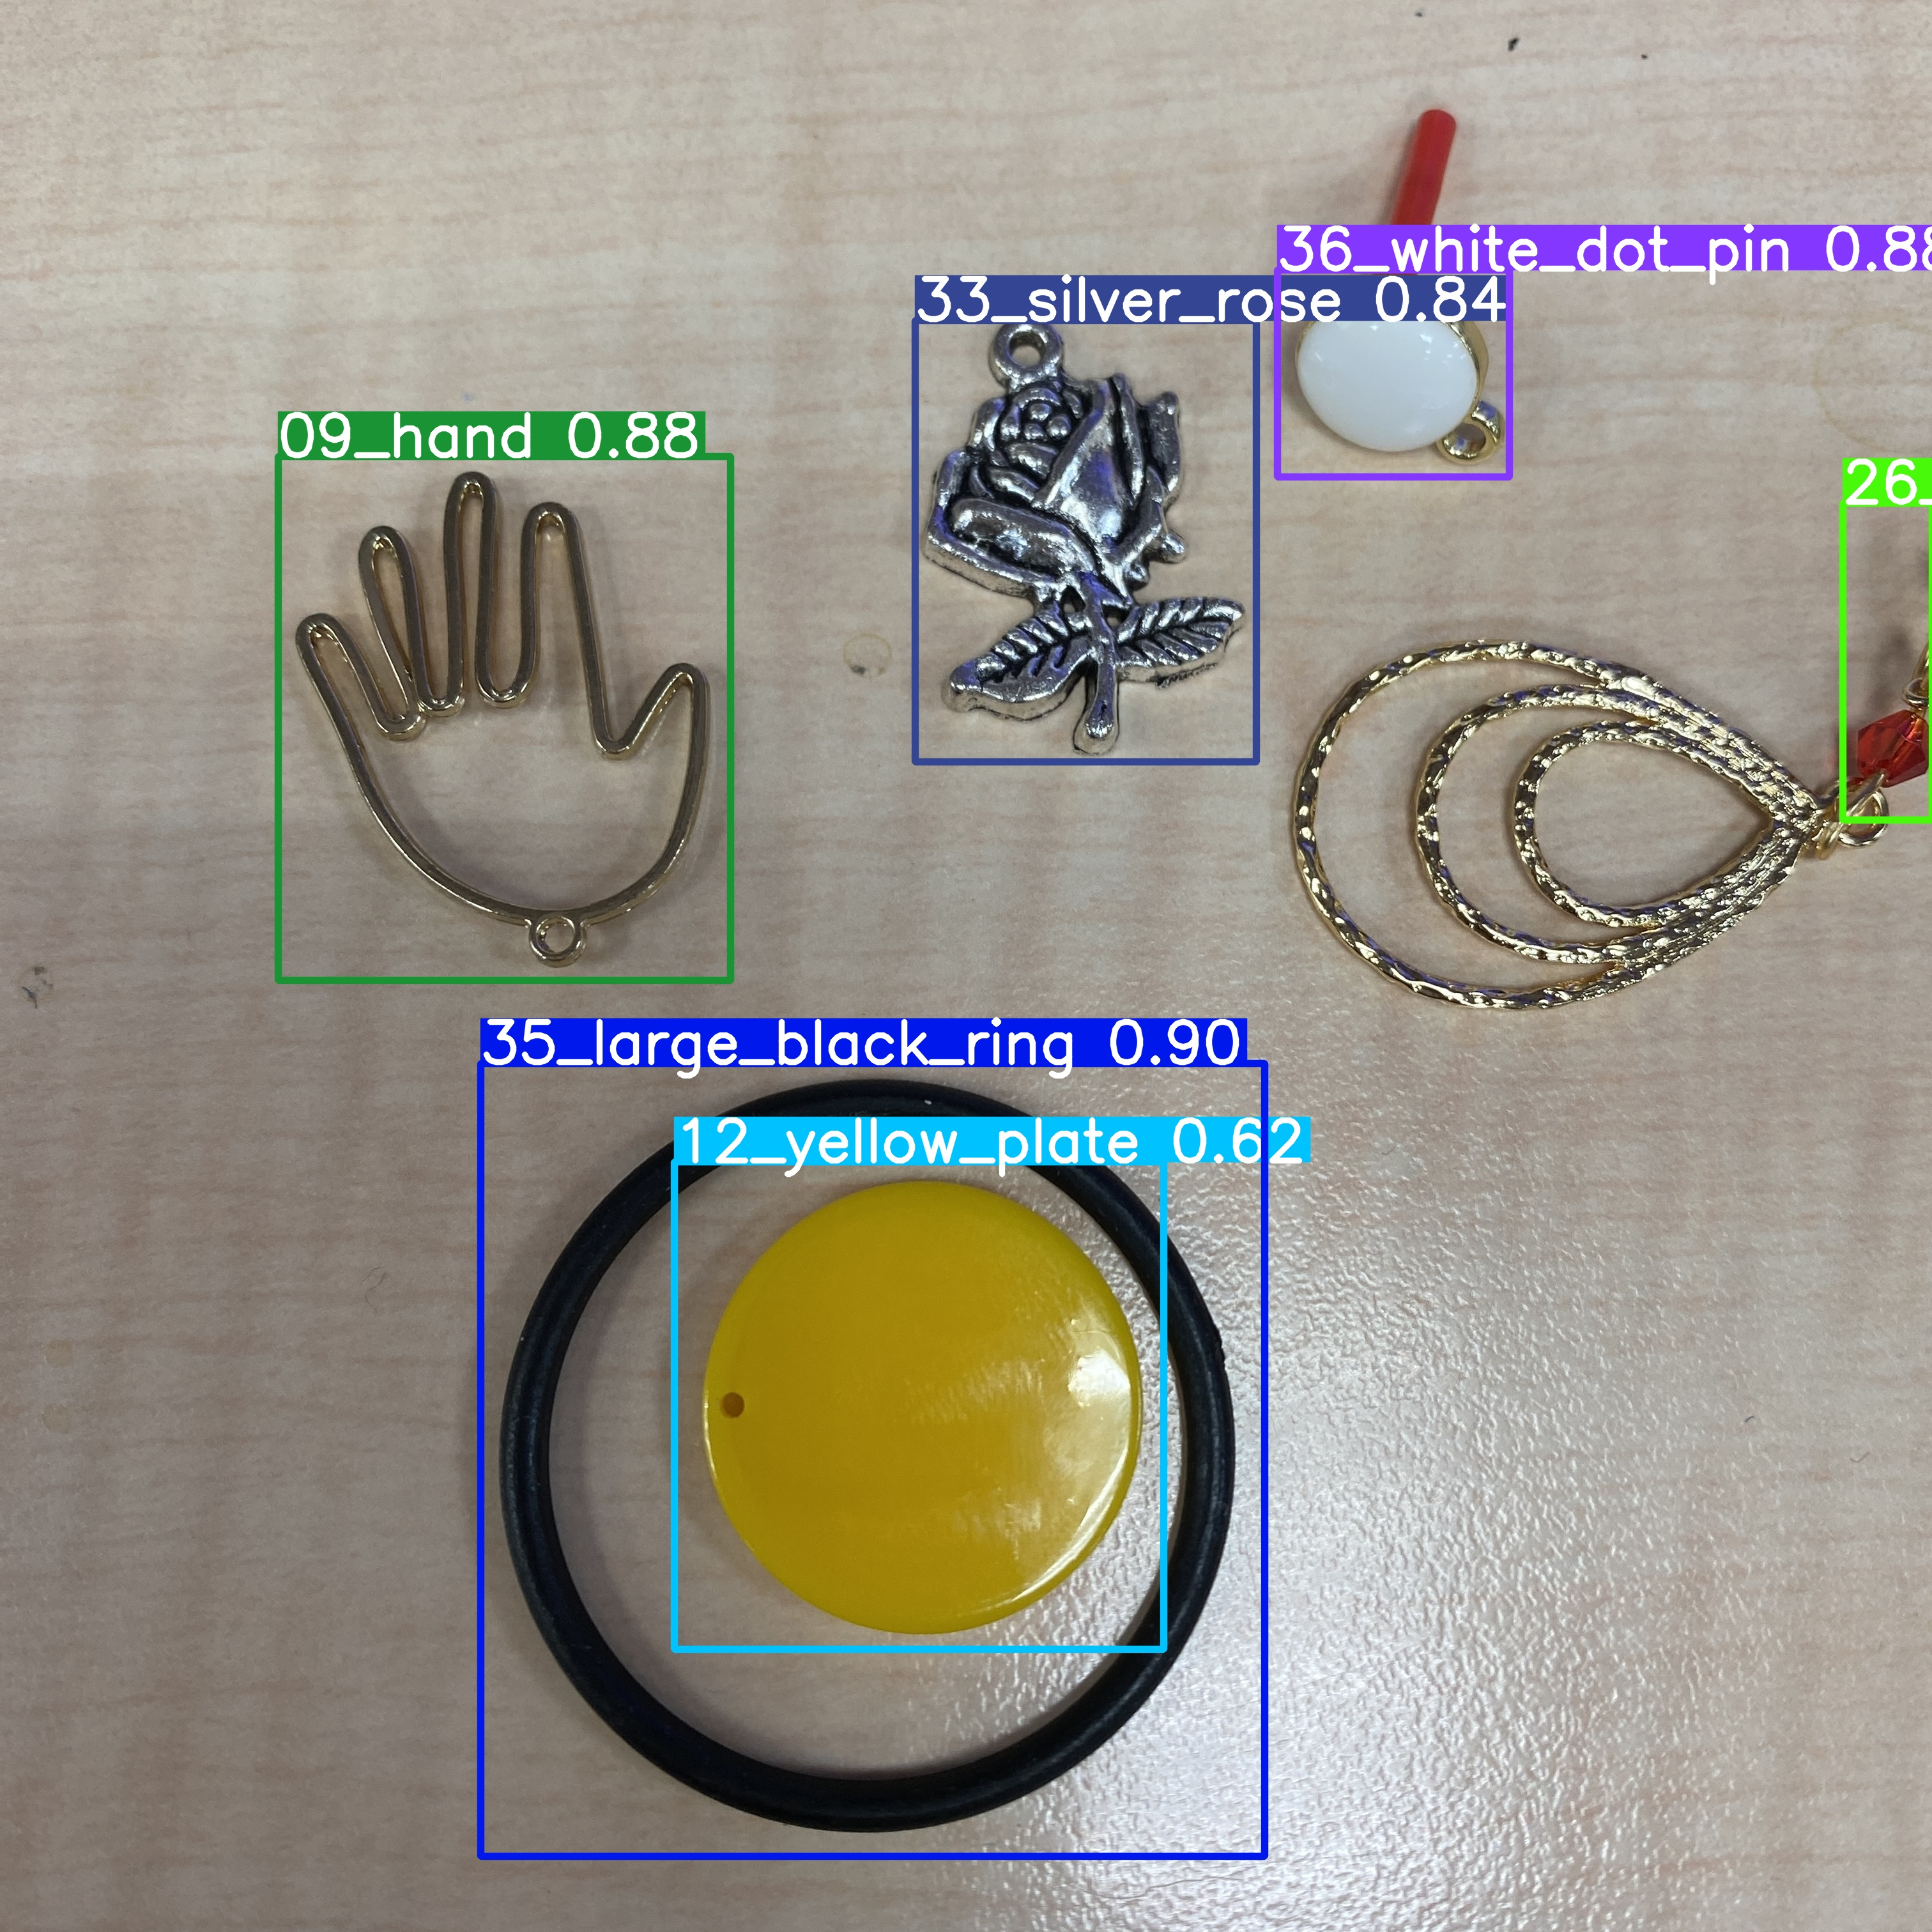

In [ ]:
## 圖示結果
display(Image(filename='/content/runs/detect/predict/hand_dog.jpg', width=400))

In [ ]:
!cp '/content/runs/detect/predict2/hand_dog.jpg' /content/drive/MyDrive/earrings_object_detection/Yolo/Training_records/#21_1122